In [4]:
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

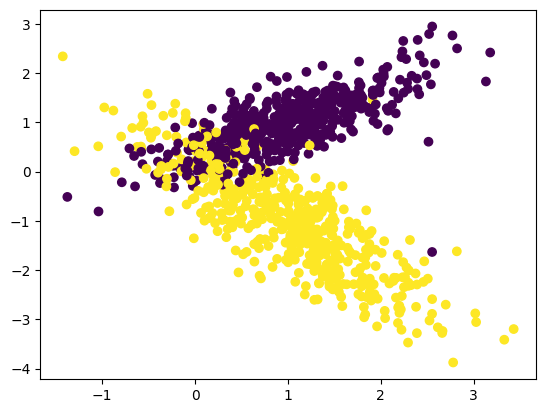

In [5]:
# Generate a make_classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

#plot
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

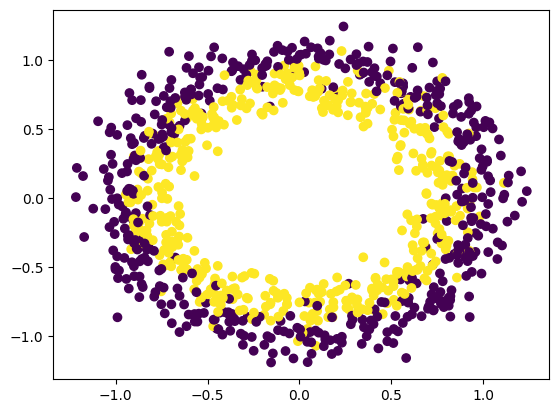

In [6]:
# make circular dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

#plot
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


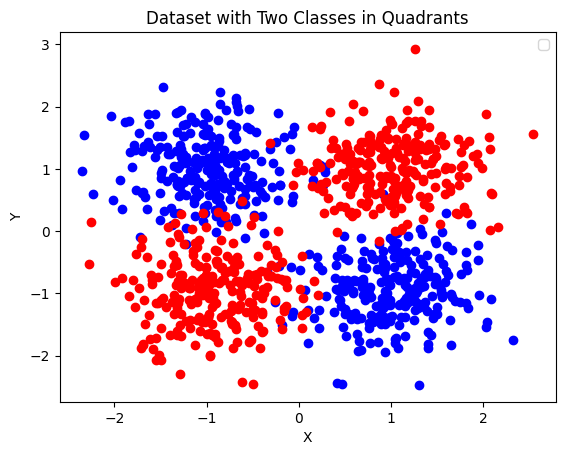

In [7]:
# generate dataset of 2 classes where class 1 in first and third quadrant and class 2 in second and fourth quadrant
# Generate blob data with two classes in quadrants
n_samples = 1000  # Number of samples
centers = [(1,1), (-1, 1), (-1, -1), (1,-1)]
cluster_std = [0.5, 0.5, 0.5, 0.5]
random_state = 42  # Random state for reproducibility

# Generate blob data
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# combine the two classes in the first and third quadrant
y[y == 0] = 2
y[y == 3] = 1

# Plot the generated dataset
colors = ['r', 'b', 'r', 'b']  # Color for each class
for i in range(len(centers)):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset with Two Classes in Quadrants')
plt.legend()
plt.show()

In [8]:
x1_min = np.min(X[:,0])
x1_max = np.max(X[:,0])

x2_min = np.min(X[:,1])
x2_max = np.max(X[:,1])

In [9]:
# Considering only degree upto 2
degree = 2
if degree == 0:
    X = np.ones((X.shape[0], 1))
elif degree == 1:
    X = np.hstack((np.ones((X.shape[0], 1)), X))
elif degree == 2:
    X = np.hstack((np.ones((X.shape[0], 1)), X, X[:,0:1]**2, X[:,1:2]**2, X[:,0:1]*X[:,1:2]))

print(X.shape)

(1000, 6)


In [10]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [11]:
#logistic regression
penalty = 'l2'
penalty_value = 0.3

model = LogisticRegression(penalty=penalty, C=penalty_value)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 96.06


Learned Coefficients (Weights):
Feature 0: -3.216339161719409e-05
Feature 1: -0.1657650577888415
Feature 2: 0.10828055860358861
Feature 3: 0.08006572832631864
Feature 4: -0.009454251489379149
Feature 5: 4.085445702522026


<BarContainer object of 6 artists>

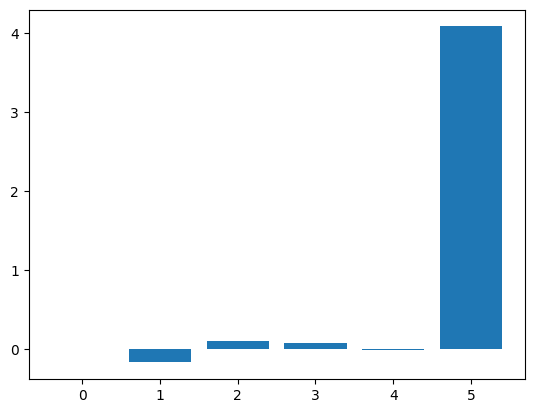

In [12]:
# Access the learned coefficients (weights)
coefficients = model.coef_

# Print the learned coefficients
print("Learned Coefficients (Weights):")
for i in range(coefficients.shape[1]):
    print(f"Feature {i}: {coefficients[0, i]}")

#make bar plot
plt.bar([i for i in range(len(coefficients[0]))], coefficients[0])

(10000,)


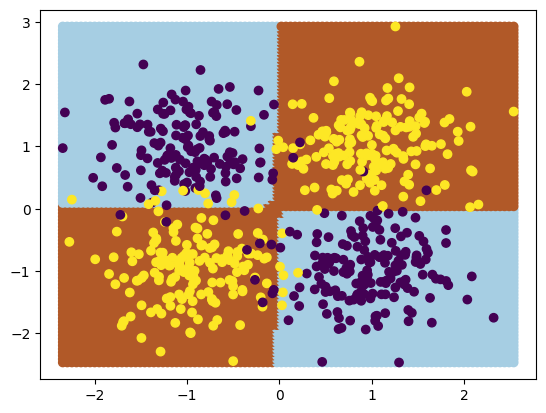

In [13]:
# plot the decision boundary using the learned coefficients
# plot the decision boundary
x1 = np.linspace(x1_min, x1_max, 100)
x2 = np.linspace(x2_min, x2_max, 100)
x1, x2 = np.meshgrid(x1, x2)
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)
X = np.hstack((x1, x2))
if degree == 0:
    X = np.ones((X.shape[0], 1))
elif degree == 1:
    X = np.hstack((np.ones((X.shape[0], 1)), X))
elif degree == 2:
    X = np.hstack((np.ones((X.shape[0], 1)), X, X[:,0:1]**2, X[:,1:2]**2, X[:,0:1]*X[:,1:2]))

y_predict = model.predict(X)
print(y_predict.shape)

plt.scatter(X[:,1], X[:,2], c=y_predict, cmap='Paired')
plt.scatter(X_train[:,1], X_train[:,2], c=y_train)
plt.show()

In [15]:
def plot_decision_surface():
    x1_min = np.min(X[:,0])
    x1_max = np.max(X[:,0])

    x2_min = np.min(X[:,1])
    x2_max = np.max(X[:,1])

    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    print(x1.shape)
    print(x2.shape)
    
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    print(x1.shape)
    print(x2.shape)

plot_decision_surface()

(100, 100)
(100, 100)
(10000, 1)
(10000, 1)


In [28]:
X=[[3,2],[2,4],[3,5]]
X=np.array(X)
X_old=X
for i in range(2,3+1):
    X=np.concatenate((X,X_old**i),axis=1)

print(X)

[[  3   2   9   4  27   8]
 [  2   4   4  16   8  64]
 [  3   5   9  25  27 125]]
